# Exercise sheet 8
**Hello everyone!**

**Points: 15**

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:

1. Make a folder called "exercise8".
2. Put your submission "Exercise sheet 8.ipynb" in there.
3. Complete the sheet. Only put code or text inside the blocks where "# YOUR CODE HERE" or "YOUR ANSWER HERE" is written. Everything else will be deleted during grading. Don't add new blocks.
4. Then zip the folder called "exerciseN". This will create a zip file called "exerciseN.zip". Rename that zip file to your Unibas short name, e.g. "blabla0000.zip".

Common mistakes:
- Don't use capital letter for your identification name, or the exercise folder.
- Don't put previous sheet or dataset on the submission folders. Just the sheet, ipynb format.



**Handout date**: 2022/05/03 <br>
**Submission date**: 2022/05/10 <br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# 1 (8 points)
We define a random variable $X_\text{mean}$ as follows:
$$
X_\text{mean} = \dfrac{1}{N} \sum_{i=1}^N X_i 
$$
Where $X_i \sim$ Binomial($n,p$). As discussed in the last lecture, we can analytically compute the mean and variance of this random variable:
$$
\mathbb{E}[X_\text{mean}] = \dfrac{1}{N} \sum_{i=1}^N \mathbb{E}[X_i] = np
$$
$$
\text{Var}[X_\text{mean}] = \dfrac{1}{N^2} \sum_{i=1}^N \text{Var}[X_i] = \dfrac{np(1-p)}{N}
$$
In this exercise, we want to verify the analytical results experimentally.
As the first step, let's define a Binomial random variable:

In [2]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Now generate a matrix with size $m \times N$ containing samples from the given Binomial distribution (call it $x$). Then calculate the mean of each row of this matrix and make a vector with size $m$ and call it mean ($m$ random samples of $X_\text{mean}$). Plot the histogram of the calculated means.

**Important**: Please do not make a new cell for the plot. Plot the histogram in the same cell.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it.

Text(0.5, 1.0, 'Histogram of mean values for 100 experiments with 10 samples')

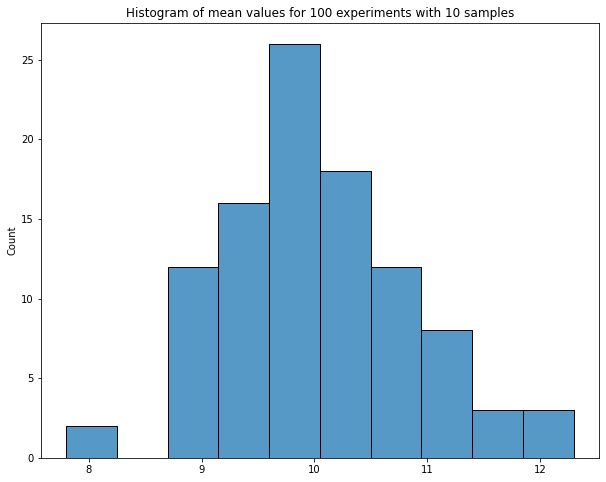

In [3]:
m = 100
N = 10
np.random.seed(0)
# YOUR CODE HERE
#raise NotImplementedError()
x = X.rvs((m,N))
mean = x.mean(1)
fig = plt.figure(figsize=(10,8))
sns.histplot(mean);
plt.title("Histogram of mean values for 100 experiments with 10 samples")

In [4]:
print(mean.mean())
print(mean.std())
assert_equal(len(x), m)
assert_almost_equal(mean.mean(), 9.983 , places=2)
assert_almost_equal(mean.std() , 0.836 , places=2)

9.983
0.8363079576328329


### 1b (4 points)
Now we want to repeat this process for $N=\{1,2,...,k\}$ instead of a single $N=10$. So write a code to generate the mean for each $N$ (as you did for $N=10$) and store all the calculated means in "means" which would be a matrix with size $k \times m$.

**Important**: Please do not use a "for-loop" for sample generation; X.rvs can take the shape of the matrix and generate it. You can use "for-loop" anywhere else.

In [5]:
m = 100
k = 50
np.random.seed(0)
means = np.zeros([k,m])
# YOUR CODE HERE
# raise NotImplementedError()
for i in range(k):
    x = X.rvs((m, i+1))
    means[i] = x.mean(1) 

In [6]:
print(len(means))
print(means.mean())
print(means.std())
assert_equal(len(means), k)
assert_almost_equal(means.mean(), 9.992 , places=2)
assert_almost_equal(means.std() , 0.677 , places=2)

50
9.992003355663684
0.6777692980147271


### 1c (2 points)
Now calculate the variance of each mean and store the variances in a vector with size k and call it variences. Plot the histogram of variences for $N=\{1,2,...,k\}$.

**Important**: Please do not make a new cell for the plot. Plot the histogram in the same cell.

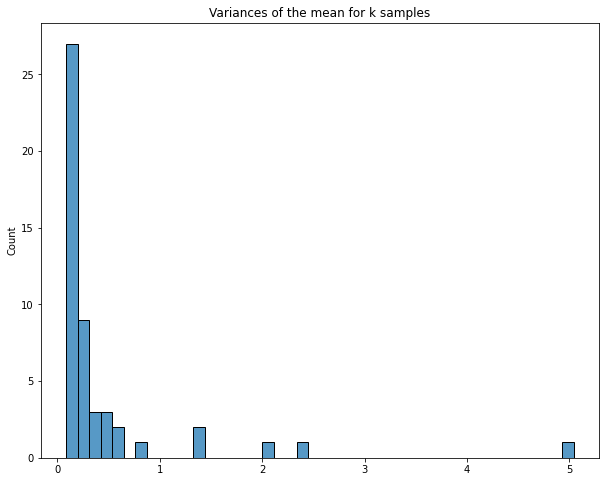

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
variances = np.var(means, axis=1)
fig = plt.figure(figsize=(10,8))
sns.histplot(variances);
plt.title("Variances of the mean for k samples");

In [8]:
print(variances.mean())
print(variances.var())

assert_almost_equal(variances.mean(), 0.455 , places=2)
assert_almost_equal(variances.var(), 0.646 , places=2)

0.45548466490645645
0.6463863675528132


Does the variance decrease as we increase the number of samples ($N$)? Why?

The more samples we have to compute the mean, the less it will differ from the true mean of the distribution, so we would expect the variance to get smaller the more samples are used to compute the mean, until it converges.

# 2 (7 points)
## Confidence Interval
In this exercise, we work on confidence interval calculation using bottstrap technique.
Let's generate $N$ samples from Gaussian distribution:

<AxesSubplot:ylabel='Count'>

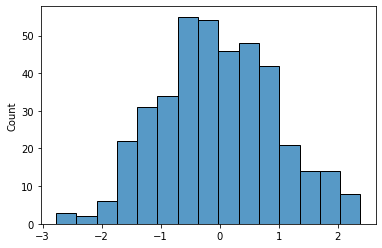

In [9]:
mu = 0.0
sigma = 1.0
N = 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 2a (6 points)

As discussed in the last lecture, one way to find the confidence interval is the bootstrap technique. Consider you are given $N$ samples, the confidence interval of $0.95$ using bootstrap is calculated as follows:

1. Select $N$ samples with replacements from the given samples.
2. Calculate the mean value and store it in an array
3. Repeat the process $k$ times On the array of mean values, calculate the 2.5th percentile and 97.5th percentile (if you want a 95% confidence interval)

Implement the bootstrap method and store the confidence interval in CI, a list with two values, the lower and the upper bounds.

The confidence interval for N=400 is: [-0.1218107   0.08417016]


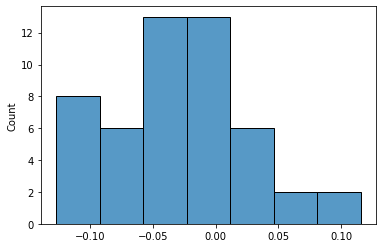

In [10]:
import random
k = 50
confidence = 0.95

np.random.seed(0)
# YOUR CODE HERE
boot_means = []
for i_boot in range(k):
    boot_means.append(np.mean(random.choices(x, k=N)))

#raise NotImplementedError()
CI = np.array([np.quantile(boot_means,q=(1-confidence)/2), np.quantile(boot_means, q=1-((1-confidence)/2))])
sns.histplot(boot_means)
print("The confidence interval for N={} is: {}".format(N,CI))

In [11]:
print(len(CI))
print(CI[1] - CI[0])
print(CI.std())
assert_equal(len(CI), 2)
assert_almost_equal(CI[1] - CI[0], 0.21 , places=2)
assert_almost_equal(CI.std() , 0.107 , places=2)

2
0.20598086184046452
0.10299043092023226


### 2b (1 points)
Compute the confidence interval for $N = 4000$ (instead of 400) 

The confidence interval for N=4000 is: [-0.05449112 -0.00138982]


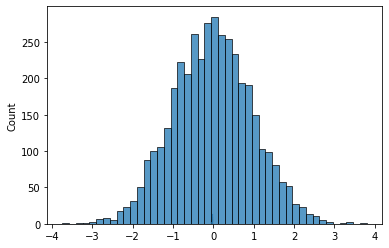

In [16]:
mu = 0.0
sigma = 1.0
N = 4000 # previously 400

np.random.seed(0)
X = stats.norm(loc = mu , scale = sigma)
x = X.rvs(N)
sns.histplot(x)

k = 50
confidence = 0.95
# YOUR CODE HERE
#raise NotImplementedError()
boot_means = []
for i_boot in range(k):
    boot_means.append(np.mean(random.choices(x, k=N)))

#raise NotImplementedError()
CI = np.array([np.quantile(boot_means,q=(1-confidence)/2), np.quantile(boot_means, q=1-((1-confidence)/2))])
sns.histplot(boot_means)
# CI

print("The confidence interval for N={} is: {}".format(N,CI))

In [17]:
print(len(CI))
print(CI[1] - CI[0])
print(CI.std())
assert_equal(len(CI), 2)
assert_almost_equal(CI[1] - CI[0], 0.054 , places=2)
assert_almost_equal(CI.std() , 0.027 , places=2)

2
0.05310130351139092
0.02655065175569546


Does the confidencence interval shrinke by increasing the number of samples ($N$)? Why?

Same as with the variance, the more samples we get the more the values estimate the real mean, because of that the confidence interval gets smaller around the real mean, because it becomes increasingly surer where the real mean is